In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix

In [171]:
df = pd.read_csv ('Data_kmean.csv')

In [172]:
df.describe()

,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_WEEKLY_VISIT,AVG_WEEKLY_SPEND,AVG_BASKET_SIZE,LAST_BASKET_SIZE,PREVIOUS_1BASKET_SIZE,PREVIOUS_2BASKET_SIZE
count,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,14766.000000,13970.000000
mean,2.006971e+07,1.126125,26.757249,1.126125,26.757249,25.758578,25.763676,21.382251,20.761436
std,7.143862e+03,0.902437,21.760327,0.902437,21.760327,20.643972,20.686383,20.000148,20.045536
min,2.006041e+07,1.000000,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,2.006111e+07,1.000000,10.400000,1.000000,10.400000,9.900000,9.870000,5.320000,4.992500
50%,2.007052e+07,1.000000,22.380000,1.000000,22.380000,21.595000,21.660000,16.050000,14.955000
75%,2.007121e+07,1.000000,37.077500,1.000000,37.077500,36.240000,36.290000,31.975000,30.977500
max,2.008071e+07,14.000000,306.970000,14.000000,306.970000,306.970000,306.970000,306.970000,346.460000


In [173]:
df.head()

,CUST_CODE,LAST_VISIT,TOTAL_VISIT,TOTAL_SPEND,AVG_WEEKLY_VISIT,AVG_WEEKLY_SPEND,AVG_BASKET_SIZE,LAST_BASKET_SIZE,PREVIOUS_1BASKET_SIZE,PREVIOUS_2BASKET_SIZE
0,CUST0000133531,20080120,7,51.88,7.0,51.88,7.411429,1.37,5.42,5.52
1,CUST0000820750,20080316,7,81.37,7.0,81.37,11.624286,14.89,10.29,7.90
2,CUST0000944007,20071014,7,44.59,7.0,44.59,6.370000,9.55,3.24,1.02
3,CUST0000820750,20080131,7,71.31,7.0,71.31,10.187143,6.32,22.17,10.60
4,CUST0000871730,20061223,7,124.18,7.0,124.18,17.740000,11.96,51.45,0.52


In [174]:
df.columns

Index(['CUST_CODE', 'LAST_VISIT', 'TOTAL_VISIT', 'TOTAL_SPEND',
       'AVG_WEEKLY_VISIT', 'AVG_WEEKLY_SPEND', 'AVG_BASKET_SIZE',
       'LAST_BASKET_SIZE', 'PREVIOUS_1BASKET_SIZE', 'PREVIOUS_2BASKET_SIZE'],
      dtype='object')

In [175]:
df.dtypes

CUST_CODE                 object
LAST_VISIT                 int64
TOTAL_VISIT                int64
TOTAL_SPEND              float64
AVG_WEEKLY_VISIT         float64
AVG_WEEKLY_SPEND         float64
AVG_BASKET_SIZE          float64
LAST_BASKET_SIZE         float64
PREVIOUS_1BASKET_SIZE    float64
PREVIOUS_2BASKET_SIZE    float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001808AF39A60>,
      dtype=object)

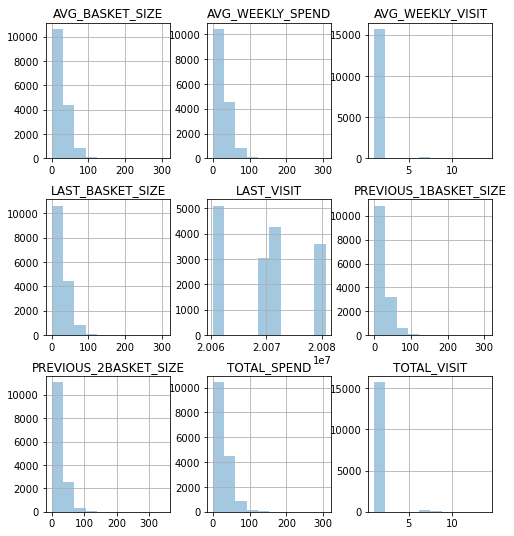

In [176]:
df.hist(alpha=0.4,figsize=(8, 9))

In [177]:
df2 = df.drop(['CUST_CODE', 'LAST_VISIT','LAST_BASKET_SIZE','PREVIOUS_1BASKET_SIZE', 'PREVIOUS_2BASKET_SIZE','AVG_WEEKLY_SPEND'], inplace=False, axis=1) 
#df2 = df

In [178]:
df3 = pd.DataFrame(df2)

In [179]:
pd.isnull(df3).sum() > 0

TOTAL_VISIT         False
TOTAL_SPEND         False
AVG_WEEKLY_VISIT    False
AVG_BASKET_SIZE     False
dtype: bool

In [180]:
Sum_of_squared_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df3)
    Sum_of_squared_distances.append(km.inertia_)

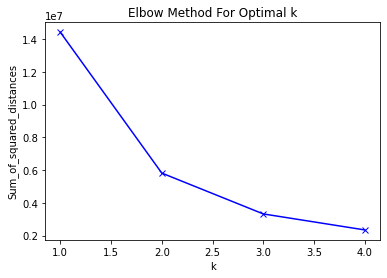

In [181]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [182]:
print('NumPy covariance matrix: \n%s' %np.cov(df3.T))

cov_mat = np.cov(df3.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

NumPy covariance matrix: 
[[  0.81439338   4.15254216   0.81439338  -2.25027088]
 [  4.15254216 473.51181617   4.15254216 412.1899688 ]
 [  0.81439338   4.15254216   0.81439338  -2.25027088]
 [ -2.25027088 412.1899688   -2.25027088 426.17357123]]
Eigenvectors 
[[ 1.71232769e-03 -1.21261670e-01  7.07106781e-01  6.96629511e-01]
 [ 7.27103626e-01 -6.76053182e-01  6.22180531e-16 -1.19467201e-01]
 [ 1.71232769e-03 -1.21261670e-01 -7.07106781e-01  6.96629511e-01]
 [ 6.86523454e-01  7.16619362e-01 -8.18840854e-16  1.23053799e-01]]

Eigenvalues 
[8.62716727e+02 3.80782849e+01 1.02677796e-15 5.19162559e-01]


In [183]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(cum_var_exp)

[95.71764779145369, 4.224751587795345, 0.05760062075096347, 1.1392009480568178e-16]
[ 95.71764779  99.94239938 100.         100.        ]


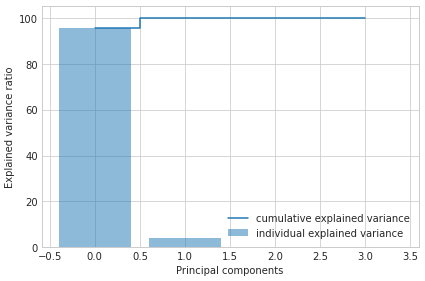

In [184]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [185]:
pca = PCA(n_components=3)
df_10d = pca.fit_transform(df3)    
    
kmeans = KMeans(n_clusters = 3)
X_clustered = kmeans.fit_predict(df_10d)    
    
df3['X_cluster'] = X_clustered    
df['X_cluster'] = X_clustered   

C:\Users\phattaraporn_c\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\phattaraporn_c\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\phattaraporn_c\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\phattaraporn_c\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\phattaraporn_c\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\phattaraporn_c\Anaconda3\lib\site-pa

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018094099F70>,
      dtype=object)

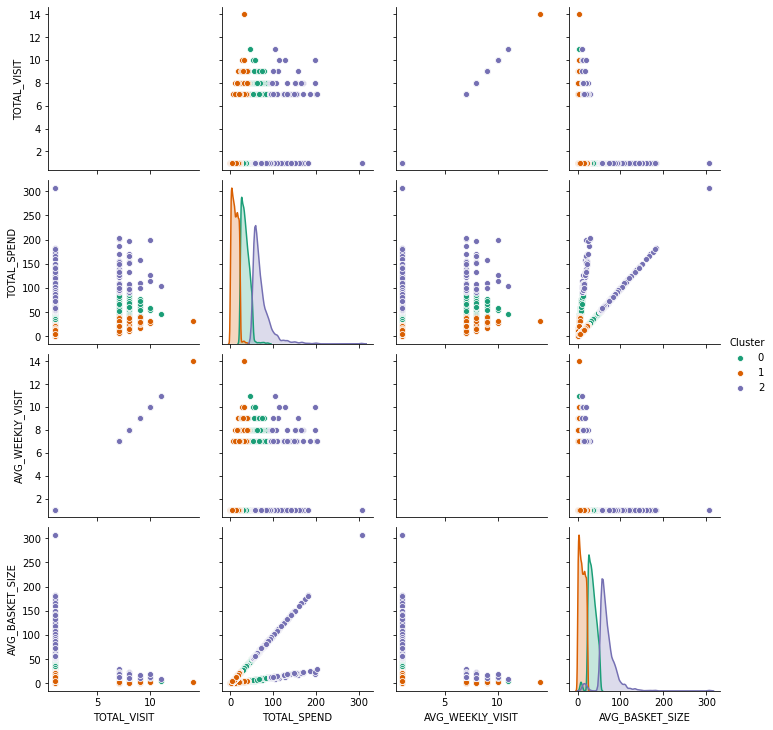

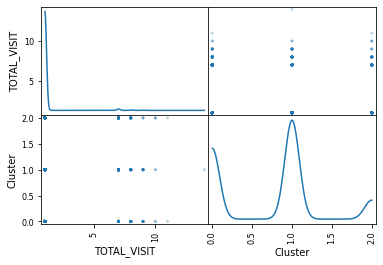

In [190]:
df_temp = df3[['TOTAL_VISIT','TOTAL_SPEND','AVG_WEEKLY_VISIT', 'AVG_BASKET_SIZE']]
df_temp['Cluster'] = X_clustered
 
sns.pairplot(df_temp, hue='Cluster', palette= 'Dark2', diag_kind='kde')

scatter_matrix(df_temp[['TOTAL_VISIT','Cluster']], alpha=0.3, diagonal='kde')